In [6]:
import pandas as pd
import numpy as np
import glob
import sys
sys.path.append('../')
from package_global_functions import *

# same function as in plot_evos.py
def getTimeEvosPath():
    extSSDpath = getExternalSSDpath()
    if os.path.exists(extSSDpath):
        path = extSSDpath + getProjectFoldername() + '/evo_to_stationary/time_evos_dif_cond'
    else:
        path = '/time_evos_dif_cond'
        print('jeje')
    return path

In [53]:
# N, pi1, pi2, q1, q2, l = 100, 0.2, 0.2, 7, 10, 0.5
N, pi1, pi2, q1, q2, l = 5000, 0.2, 0.2, 7, 10, 0.6
# get the dataframes with the time evolutions:
folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}'
files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
dfs = [pd.read_csv(file) for file in files]

In [54]:
df = dfs[0]

In [55]:
w = 10
block_avgs = [np.average(df['f2'].iloc[i:i+w]) for i in range(0, len(df), w)]

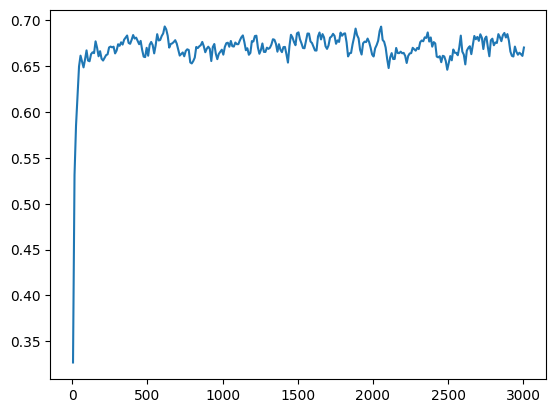

In [56]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
times = [w*i+w/2 for i in range(len(block_avgs))]
ax.plot(times, block_avgs)

In [57]:
# average difference tolerance
t = 0.001
for i, bavg, bavg2 in zip(range(len(block_avgs[:-1])), block_avgs[:-1], block_avgs[1:]):
    if abs(bavg - bavg2) < t:
        print(f'Stationary time between blocks {i} and {i+1}.')
        print(f'This is, between times {i*w} and {(i+1)*w}')
        break


Stationary time between blocks 10 and 11.
This is, between times 100 and 110
